# Machine Learning
## Lab \#4: Support Vector Machine Classifier
### Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)
---

Support vector machine or **SVM** for short is also known as a discriminative classifier. The concepts are relatively simple. Using a hyperplane with the largest possible margin, the classifier separates data points. The **SVM** classifier finds an optimal hyperplane which allows classifying new data points much more accurately compared to other classifiers such as logistic regression, knn, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

Load the dataset `make_blobs` from the `datasets` module of the `sklearn` library.

In [2]:
from sklearn.datasets import make_blobs

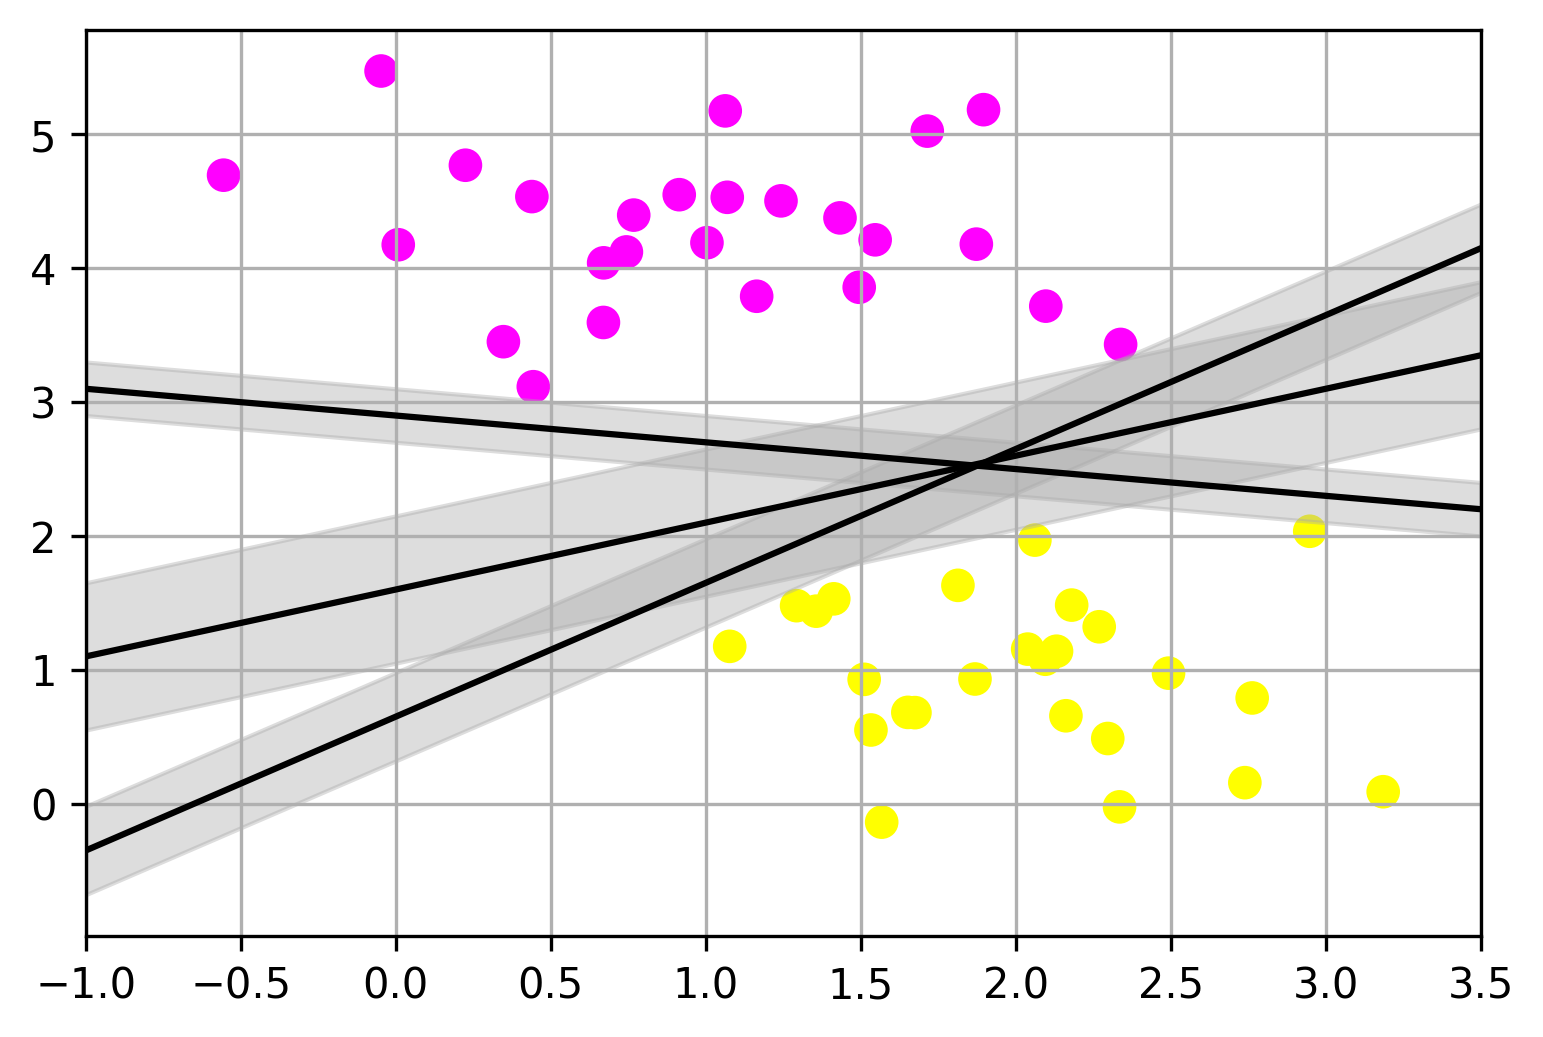

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.grid()

Import the **Support Vector Machine Classifier**.

In [4]:
from sklearn.svm import SVC

A full description of the available methods can be retrieved from the official website of [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

|Syntax|Description|
|---------:|:------------|
|`decision_function(X)`| Evaluates the decision function for the samples in X.|
|`fit(X, y[, sample_weight])`| Fit the SVM model according to the given training data.|
|`get_params([deep])`| Get parameters for this estimator.|
|`predict(X)`| Perform classification on samples in X.|
|`score(X, y[, sample_weight])`| Return the mean accuracy on the given test data and labels.|
|`set_params(**params)`| Set the parameters of this estimator.|

We will choose a linear kernel as the distribution of the points can be linearly separated.

In [5]:
clf = SVC(kernel='linear')

Fit to the data the **SVM** classifier, denoted here by `clf`.

In [6]:
clf.fit(X, y)

SVC(kernel='linear')

Define a function `plot_svc_decision_function` that will plot **SVM** decision boundaries.

In [7]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

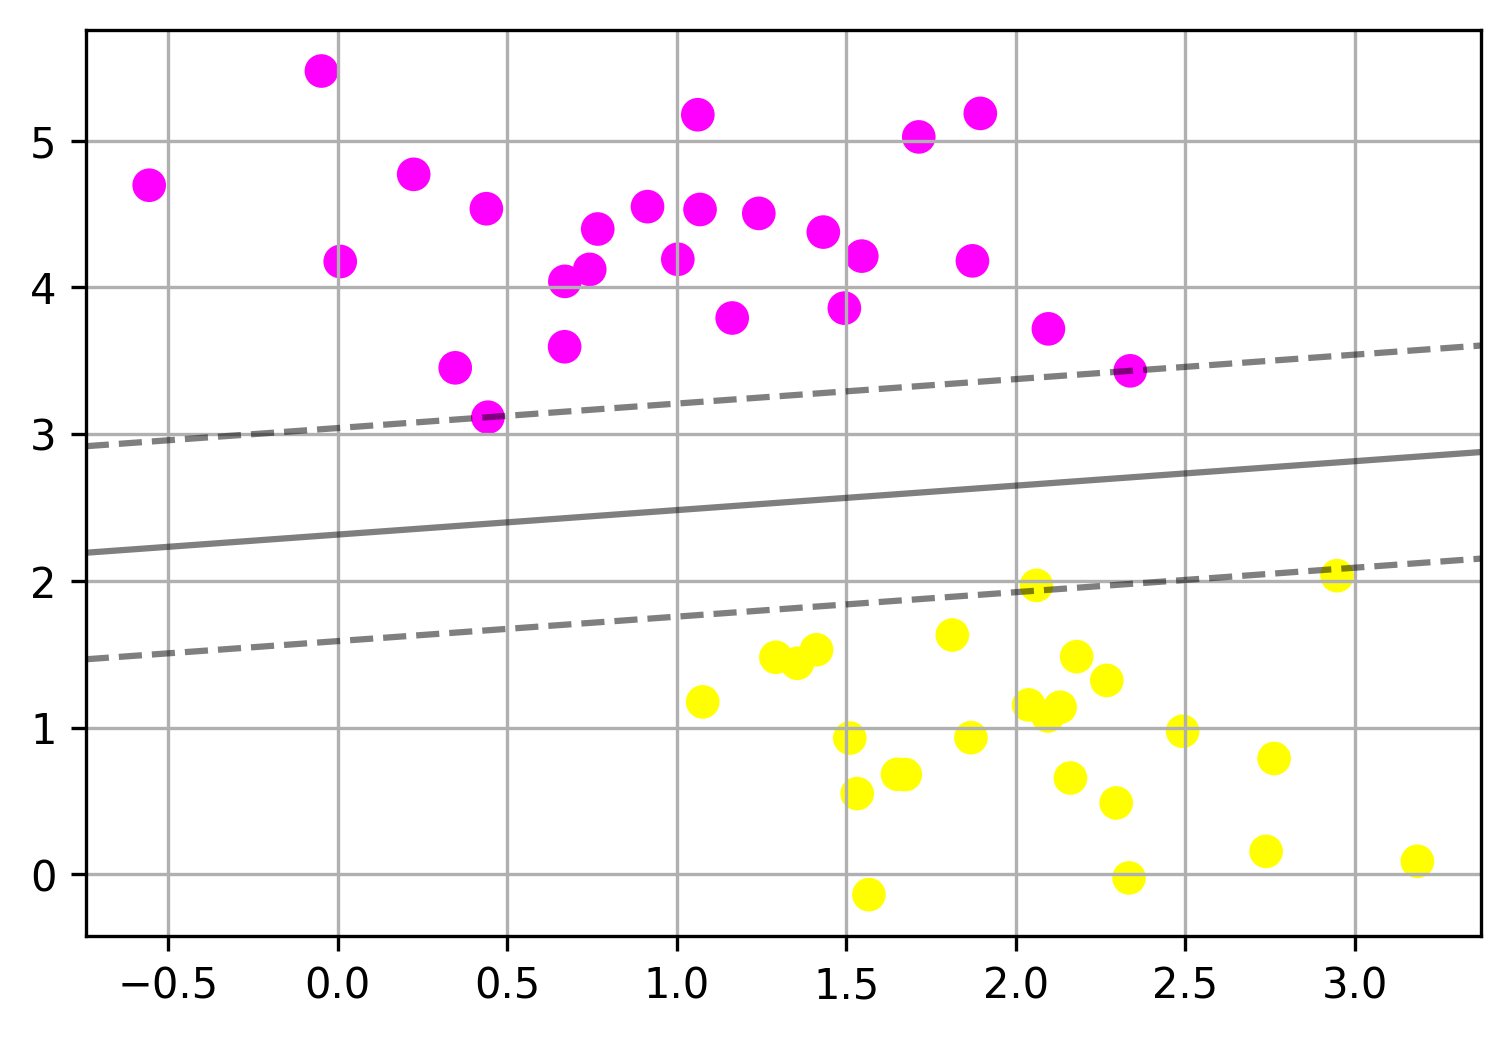

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none');
plt.grid()